### Load and Modify Configuration File

In [1]:
from configs.config_loader import load_config
config = load_config('configs/default.yaml')

version : default
seed : 1
g : 9.81
l : 1
theta0 : 100
omega0 : 0
T : 10
N_col : 1024
N_hidden : 4
N_neurons : 50
activation : tanh
N_epochs : 15000
learning_rate : 0.001
decay_rate : 1.0
freq_log : 10
freq_print : 100
keys_print : ['loss_P', 'loss_IC']
reg_epochs : 10000


### Initialize Physics-Informed Neural Network

In [2]:
from model.neural_net import PhysicsInformedNN
PINN = PhysicsInformedNN(config, verbose=True)

2024-08-21 12:34:13.572419: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-21 12:34:13.612940: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-21 12:34:13.613660: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-21 12:34:14.280525: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Model: "PhysicsInformedNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                100       
                                                                 
 dense_1 (Dense)             (None, 50)                2550      
                                                                 
 dense_2 (Dense)             (None, 50)                2550      
                                                                 
 dense_3 (Dense)             (None, 50)                2550      
                                                                 
 dense_4 (Dense)             (None, 1)                 51        
                                                                 
Total params: 7801 (30.47 KB)
Trainable params: 7801 (30.47 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
*** PINN build 

### Train Physics-Informed Neural Network

In [8]:
training_log = PINN.train()

Training started...
    0/15000 | loss_P: 7.55e+01 | loss_IC: 8.60e-02
  100/15000 | loss_P: 1.42e+01 | loss_IC: 1.94e+01
  200/15000 | loss_P: 1.27e+01 | loss_IC: 1.43e+01
  300/15000 | loss_P: 1.33e+01 | loss_IC: 1.37e+01
  400/15000 | loss_P: 1.27e+01 | loss_IC: 1.41e+01
  500/15000 | loss_P: 9.83e+00 | loss_IC: 5.45e-01
  600/15000 | loss_P: 1.27e+01 | loss_IC: 8.19e+00
  700/15000 | loss_P: 7.43e+00 | loss_IC: 6.16e-01
  800/15000 | loss_P: 6.11e+00 | loss_IC: 4.05e-02
  900/15000 | loss_P: 5.69e+00 | loss_IC: 6.79e-02
 1000/15000 | loss_P: 5.93e+00 | loss_IC: 1.64e-01
 1100/15000 | loss_P: 1.01e+01 | loss_IC: 7.16e-01
 1200/15000 | loss_P: 9.88e+00 | loss_IC: 1.52e+01
 1300/15000 | loss_P: 9.11e+00 | loss_IC: 1.43e+01
 1400/15000 | loss_P: 1.03e+01 | loss_IC: 1.35e+01
 1500/15000 | loss_P: 9.56e+00 | loss_IC: 1.20e+01
 1600/15000 | loss_P: 9.56e+00 | loss_IC: 8.70e+00
 1700/15000 | loss_P: 6.06e+00 | loss_IC: 4.28e-01
 1800/15000 | loss_P: 5.55e+00 | loss_IC: 1.27e-02
 1900/15000

# Plot Section

In [4]:
from model.plots import learning_curves, pendulum_dynamics, loss_collocation

### Learning Curves

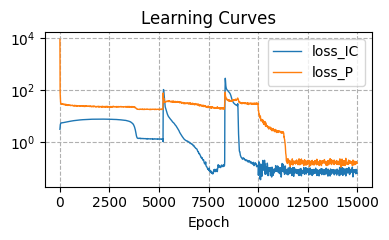

In [5]:
learning_curves(training_log)

### Pendulum Dynamics

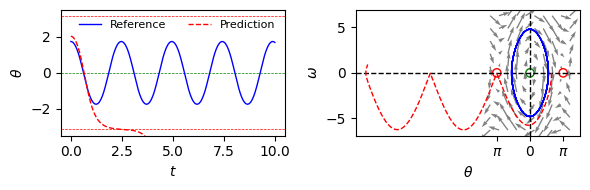

In [6]:
pendulum_dynamics(PINN)

### Loss over collocation points

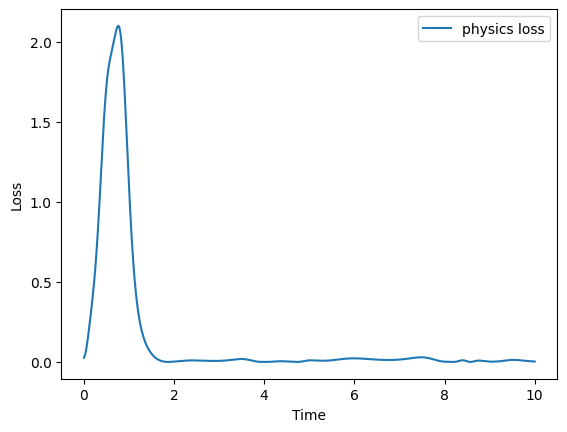

In [7]:
import tensorflow as tf
import numpy as np

t_coll = np.linspace(0, int(config["T"]), 1024).reshape(-1, 1)
t_coll = np.sort(t_coll)

t_coll = tf.convert_to_tensor(t_coll, dtype=tf.float32)

loss_collocation(PINN, t_coll)